In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
# file = open("data_kelly_large_scale_dense_ECOS_3_12_2021_14_39.pkl", 'rb')
# stuff = pickle.load(file, encoding='latin1')
# file.close()
# baseline_objf_opt_s = stuff["baseline_objf_opt_s"]
# baseline_total_time_cost = stuff["baseline_total_time_cost"]
# baseline_mosek_solve_time = stuff["baseline_mosek_solve_time"]
# print(baseline_objf_opt_s)
# print(baseline_total_time_cost)
# print(baseline_mosek_solve_time)

In [4]:
# file = open("data_kelly_large_scale_dense_ECOS_2000_3_12_2021_17_47.pkl", 'rb')
# file = open("data_kelly_large_scale_dense_group3_3_11_2021_17_52.pkl", 'rb')
file = open("data_exp_density_pnt1_3_19_2021_0_24.pkl", 'rb')

# file = open("data_evar_MOSEK_3_13_2021_14_21.pkl", 'rb')
# file = open("data_evar_MOSEK_2501_3_14_2021_0_18.pkl", 'rb')
# file = open("data_kelly__3_14_2021_17_2.pkl", 'rb')
stuff = pickle.load(file, encoding='latin1')
file.close()

In [8]:
alg_props = stuff["alg_props"]
objfs = stuff["objfs"]
objfs_validation = stuff["objfs_validation"]
lower_bounds = stuff["lower_bounds"]
runtimes = stuff["runtimes"]
opt_res_norms = stuff["opt_res_norms"]

alg_props = stuff["alg_props"]
time_cost_details = stuff["time_cost_details"]
best_xs = stuff["best_xs"]

ts = stuff["ts"]
q_norms = stuff["q_norms"]
f_grad_norms = stuff["f_grad_norms"]
num_f_evas_line_searchs = stuff["num_f_evas_line_searchs"]

baseline_objf_opt_s = stuff["baseline_objf_opt_s"]

In [9]:
mean_time_details = np.mean(time_cost_details, axis=3)
print(mean_time_details.shape)
print("f eval, grad f eval, curvature, subp, line search, L_k eval / 10")
for alg_idx in range(len(alg_props)):
    print(['{:g}'.format(float('{:.2g}'.format(mean_time_details[i, 0, alg_idx]))) for i in range(6)])

(6, 1, 1)
f eval, grad f eval, curvature, subp, line search, L_k eval / 10
['4.9e-05', '5.7e-05', '2.4e-05', '0.0029', '0.00012', '0.00033']


In [10]:
num_trials, num_alg, max_num_rounds = objfs.shape
n, _, _ = best_xs.shape

if baseline_objf_opt_s is None:
    objf_min = np.min(objfs)
else:
    objf_min = np.min(baseline_objf_opt_s)

objfs_best = np.array(objfs)
for alg_idx in range(num_alg):
    tmp_min = objfs[0, alg_idx, 0]
    for i in range(1, max_num_rounds):
        tmp_min = min(objfs[0, alg_idx, i], tmp_min)
        objfs_best[0, alg_idx, i] = tmp_min

In [11]:
res_start_idx = 1
opt_res_norms_best = np.array(opt_res_norms)
for alg_idx in range(num_alg):
    tmp_min = opt_res_norms[0, alg_idx, res_start_idx]
    for i in range(res_start_idx + 1, max_num_rounds):
        if ts[0, alg_idx, i] == 1:
            tmp_min = min(opt_res_norms[0, alg_idx, i], tmp_min)
        opt_res_norms_best[0, alg_idx, i] = tmp_min

In [12]:
from matplotlib.patches import Patch
import matplotlib.lines as mlines
font = {'family': 'serif',
        'size': 16,
        }
colors = ["b", "b", "b", "orange", "orange", "orange", "green", "green", "green"]
lines = ["-", "--", ":", "-", "--", ":", "-", "--", ":"]
legend_elements = [Patch(facecolor='b', edgecolor='b', label=r'$r=50$'),
                   Patch(facecolor='orange', edgecolor='orange', label=r'$r=20$'),
                   Patch(facecolor='green', edgecolor='green', label=r'$r=0$'),
                   mlines.Line2D([], [], color='k', label=r'$M=50$'),
                   mlines.Line2D([], [], linestyle='--', color='k', label=r'$M=20$'),
                   mlines.Line2D([], [], linestyle=':', color='k', label=r'$M=1$')]

Text(0, 0.5, 'Estimated suboptimality')

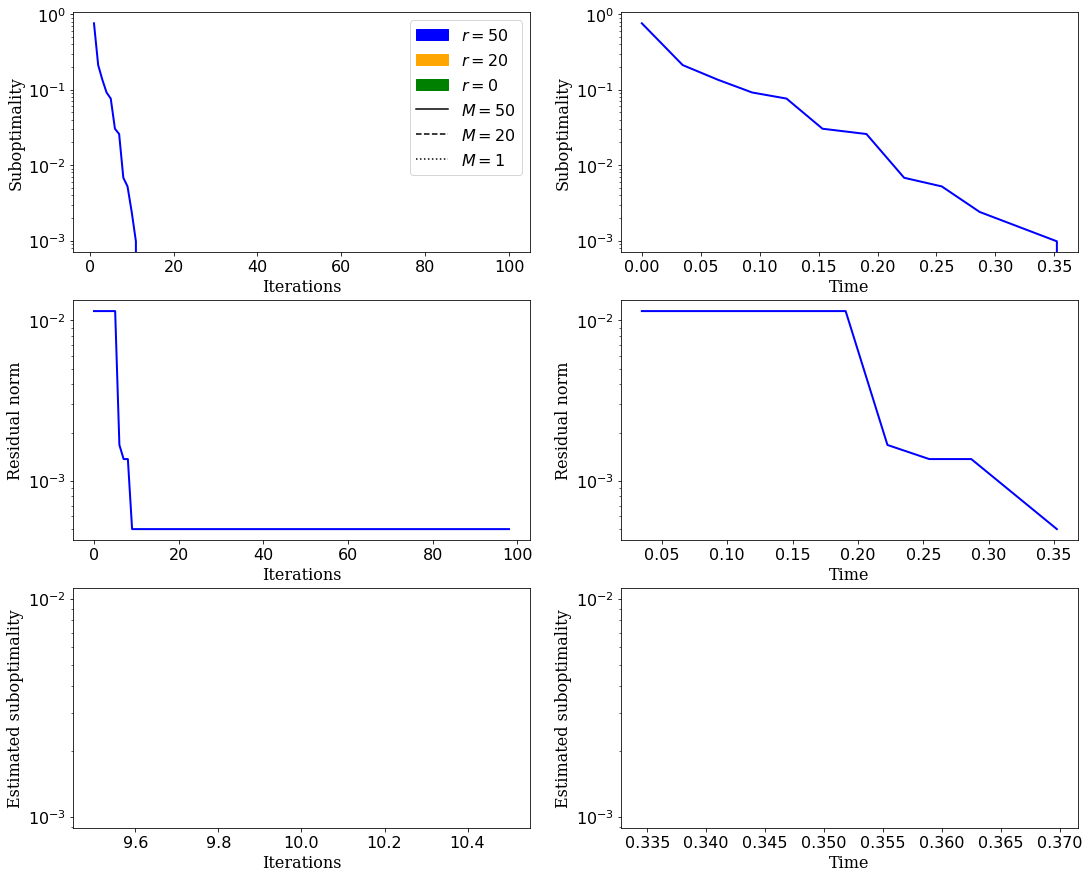

In [13]:
fig = plt.figure(figsize=(18, 15))
gs = gridspec.GridSpec(3, 2)
plt.rcParams.update({'font.size': 16})

max_num_rounds = 100

plot1 = fig.add_subplot(gs[0, 0])
for alg_idx in range(0, num_alg):
    plot1.plot(np.arange(1, max_num_rounds + 1),
               objfs_best[0, alg_idx, 0:max_num_rounds] - objf_min, lines[alg_idx], label=str(alg_idx), 
               c=colors[alg_idx], linewidth=2)
plot1.set_xlabel("Iterations", fontdict=font)
plot1.set_ylabel("Suboptimality", fontdict=font)
plot1.set_yscale("log")

plot1.legend(handles=legend_elements, prop=font)

plot2 = fig.add_subplot(gs[0, 1])
for alg_idx in range(0, num_alg):
    plot2.plot(np.cumsum(runtimes[0, alg_idx, 0:max_num_rounds]),
               objfs_best[0, alg_idx, 0:max_num_rounds] - objf_min, lines[alg_idx], label=str(alg_idx), 
               c=colors[alg_idx], linewidth=2)
plot2.set_xlabel("Time", fontdict=font)
plot2.set_ylabel("Suboptimality", fontdict=font)
plot2.set_yscale("log")

#=============================================================================================
plot3 = fig.add_subplot(gs[1, 0])
for alg_idx in range(num_alg):
    plot3.plot(opt_res_norms_best[0, alg_idx, res_start_idx:max_num_rounds] / n, lines[alg_idx], 
               label=str(alg_idx), c=colors[alg_idx], linewidth=2)
plot3.set_yscale("log")
plot3.set_xlabel("Iterations", fontdict=font)
plot3.set_ylabel("Residual norm", fontdict=font)

plot4 = fig.add_subplot(gs[1, 1])
for alg_idx in range(num_alg):
    plot4.plot(np.cumsum(runtimes[0, alg_idx, res_start_idx:max_num_rounds]) 
               + np.sum(runtimes[0, alg_idx, 0:res_start_idx]),
               opt_res_norms_best[0, alg_idx, res_start_idx:max_num_rounds] / n, lines[alg_idx], 
               label=str(alg_idx), c=colors[alg_idx], linewidth=2)
plot4.set_yscale("log")
plot4.set_xlabel("Time", fontdict=font)
plot4.set_ylabel("Residual norm", fontdict=font)

#================================================================================================
plot5 = fig.add_subplot(gs[2, 0])
for alg_idx in range(num_alg):
    plot5.plot(objfs_best[0, alg_idx, 0:max_num_rounds] 
               - lower_bounds[0, alg_idx, 0:max_num_rounds], lines[alg_idx], 
               label=str(alg_idx), c=colors[alg_idx], linewidth=2)
plot5.set_yscale("log")
plot5.set_xlabel("Iterations", fontdict=font)
plot5.set_ylabel("Estimated suboptimality", fontdict=font)

plot6 = fig.add_subplot(gs[2, 1])
for alg_idx in range(num_alg):
    plot6.plot(np.cumsum(runtimes[0, alg_idx, 0:max_num_rounds]),
               objfs_best[0, alg_idx, 0:max_num_rounds] 
               - lower_bounds[0, alg_idx, 0:max_num_rounds], lines[alg_idx], label=str(alg_idx), 
               c=colors[alg_idx], linewidth=2)
plot6.set_yscale("log")
plot6.set_xlabel("Time", fontdict=font)
plot6.set_ylabel("Estimated suboptimality", fontdict=font)

# plot1.set_ylim([1e-3, 1e-1])
# plot2.set_ylim([5e-7, 1])
# plt.savefig("large_scale_dense_kelly_group3.pdf")

In [14]:
print(alg_props.keys())

dict_keys(['r=20, M=20'])


In [16]:
print(np.mean(num_f_evas_line_searchs[0, 0, 1:20], axis=0))

1.0526315789473684
